# Final Project - Real Estate Evaluation

#### Name: Yash Chaturvedi

#### Date: 02/20/2023

In [190]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1. Data Cleaning/Preparation

### 1.1. Reading the excel file

In [228]:
# Load the Excel file into a Pandas DataFrame
real_estate = pd.read_excel('Real_estate_valuation_data_set.xlsx')
df_real_estate_data_file = pd.DataFrame(real_estate)
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


### 1.2. Null, NaN and missing values

In [229]:
# Check for NaN values, null or missing values
print('The number of NaN values in each column of the dataset:\n', df_real_estate_data_file.isnull().sum())
print()

# check for null values
print('The number of null values in each column of the dataset:\n', df_real_estate_data_file.isna().sum())
print()

# check for missing values
print('Total number of missing values in the entire dataset =\n', df_real_estate_data_file.isnull().sum().sum())

The number of NaN values in each column of the dataset:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

The number of null values in each column of the dataset:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Total number of missing values in the entire dataset =
 0


### 1.3. Drop irrelevant columns

In [230]:
# The 'No' column is not relevant for our analysis so we can drop it.
df_real_estate_data_file.drop('No', axis=1, inplace=True)

list(df_real_estate_data_file.columns)

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [231]:
# Rename the columns to remove the prefix
df_real_estate_data_file.columns = df_real_estate_data_file.columns.str.replace(' ', '_')

# Print the columns of the DataFrame
print(list(df_real_estate_data_file.columns))

['X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 'Y_house_price_of_unit_area']


## 2. Exploratory Data Analysis

### 2.1 Frequency Distribution

In [232]:
# Construct a frequency distribution of the 'house price of unit area' variable
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

freq_dis_real_estate = df_real_estate_data_file['Y_house_price_of_unit_area'].value_counts(bins=bins).sort_index()
freq_dis_real_estate_data_percentages = round((df_real_estate_data_file['Y_house_price_of_unit_area'].value_counts(bins=bins, normalize=True).sort_index()*100), 2)

# Print the frequency distribution
print(freq_dis_real_estate)
print()
print(freq_dis_real_estate_data_percentages)


(-0.001, 5.0]     0
(5.0, 10.0]       1
(10.0, 15.0]     14
(15.0, 20.0]     21
(20.0, 25.0]     44
(25.0, 30.0]     46
(30.0, 35.0]     41
(35.0, 40.0]     57
(40.0, 45.0]     70
(45.0, 50.0]     47
(50.0, 55.0]     34
(55.0, 60.0]     20
(60.0, 65.0]     11
(65.0, 70.0]      2
(70.0, 75.0]      3
(75.0, 80.0]      2
(80.0, 85.0]      0
(85.0, 90.0]      0
(90.0, 95.0]      0
(95.0, 100.0]     0
Name: Y_house_price_of_unit_area, dtype: int64

(-0.001, 5.0]     0.00
(5.0, 10.0]       0.24
(10.0, 15.0]      3.38
(15.0, 20.0]      5.07
(20.0, 25.0]     10.63
(25.0, 30.0]     11.11
(30.0, 35.0]      9.90
(35.0, 40.0]     13.77
(40.0, 45.0]     16.91
(45.0, 50.0]     11.35
(50.0, 55.0]      8.21
(55.0, 60.0]      4.83
(60.0, 65.0]      2.66
(65.0, 70.0]      0.48
(70.0, 75.0]      0.72
(75.0, 80.0]      0.48
(80.0, 85.0]      0.00
(85.0, 90.0]      0.00
(90.0, 95.0]      0.00
(95.0, 100.0]     0.00
Name: Y_house_price_of_unit_area, dtype: float64


### 2.2 Histogram - response variable

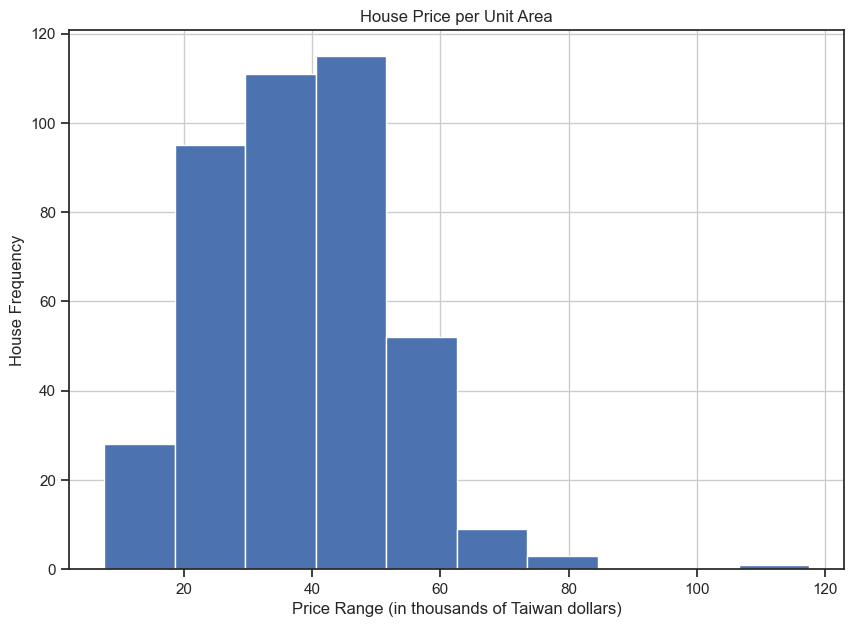

In [233]:
# Construct a histogram of the 'house price of unit area' variable
fig, ax = plt.subplots(figsize = (10, 7))
# Set the grid = True, to get a better sense of the values.
df_real_estate_data_file['Y_house_price_of_unit_area'].hist(grid = True)
plt.title('House Price per Unit Area')
plt.xlabel('Price Range (in thousands of Taiwan dollars)')
plt.ylabel('House Frequency')
plt.show()

The histogram is positively skewed with a few outliers on the upper hand.
The positive skewness would also mean that the mean would be greater than the median.

### 2.3 Mean, Median and Standard Deviation of response variable

In [234]:
import numpy as np
# Mean, Median, Standard Deviation
mean = np.mean(df_real_estate_data_file['Y_house_price_of_unit_area'])
print('Mean = %.2f'% mean)

median = np.median(df_real_estate_data_file['Y_house_price_of_unit_area'])
print('Median = %.2f'% median)

standard_deviation = np.std(df_real_estate_data_file['Y_house_price_of_unit_area'])
print('Standard_deviation = %.2f' % standard_deviation)

Mean = 37.98
Median = 38.45
Standard_deviation = 13.59


As we can see the median is greater than the mean, we can say that the distribution is right-skewed or positively skewed. In a right-skewed distribution, the majority of the data points are located on the left-hand side of the distribution, with a long tail on the right-hand side. This means that there are some extreme values or outliers towards the higher end of the distribution, which pull the mean towards that direction, while the median remains closer to the center of the distribution.

### 2.4. Influential Observations - Outliers

#### 2.4.1. Box-plot - response variable

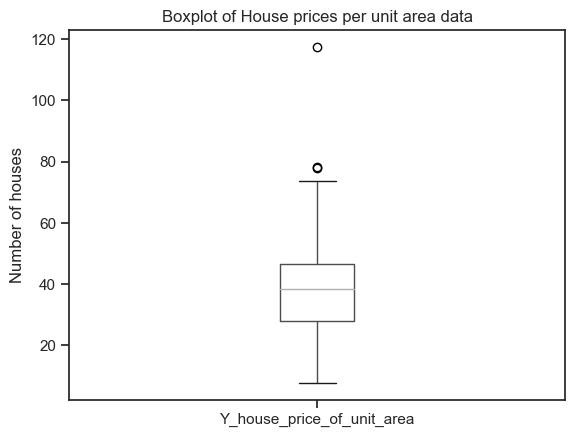

In [120]:
# Box plot construction
real_estate_bp = pd.DataFrame(df_real_estate_data_file['Y_house_price_of_unit_area'])
real_estate_bp.boxplot(grid = False) 
# plot title
plt.title ('Boxplot of House prices per unit area data')
# y-axis label
plt.ylabel('Number of houses')  
plt.show()

The boxplot seems to be slightly negatively skewed. The min is closer to the lower quartile, then the max which is a bit farther away that the upper quartile. There seems to be 2 outliers.

#### Ways to highlight observations that fall far from the model fit -

     We can plot residuals to detect observations that fall far from the trend generated by the model.
     The leverage is a measure of an observation's potential influence on the fit. 
     Observations for which explanatory variables are far from their means have greater potential influence on the        least squares estimates. 
     For an observation to actually be influential, it must have both a relatively large leverage and a relatively        large residual.

#### 2.4.2. Z-scores to highlight outliers

Z-score can be calculated using the formula: (data point - mean) / standard deviation.

In [237]:
# Calculate z-scores for each data point
df_real_estate_data_file['z_score'] = (df_real_estate_data_file['Y_house_price_of_unit_area'] - mean) / standard_deviation

# Identify outliers with z-score greater than 3 or -3
outliers_z = df_real_estate_data_file.loc[(df_real_estate_data_file['z_score'] > 3) | (df_real_estate_data_file['z_score'] < -3)]

print('Outliers detected by z-score method:\n')
print(outliers_z)

df_real_estate_data_file = df_real_estate_data_file.drop('z_score', axis = 1)

Outliers detected by z-score method:

     X1_transaction_date  X2_house_age  \
270          2013.333333          10.8   

     X3_distance_to_the_nearest_MRT_station  X4_number_of_convenience_stores  \
270                                252.5822                                1   

     X5_latitude  X6_longitude  Y_house_price_of_unit_area   z_score  
270      24.9746     121.53046                       117.5  5.851328  


One observation was detected as an outlier using the Z-scores method.

#### 2.4.3. Interquartile Range to highlight outliers

In [238]:
lower_quantile = np.quantile(df_real_estate_data_file['Y_house_price_of_unit_area'], .25)
upper_quantile = np.quantile(df_real_estate_data_file['Y_house_price_of_unit_area'], .75)

iqr = upper_quantile - lower_quantile

# Identify outliers using IQR method
outliers_iqr = df_real_estate_data_file.loc[(df_real_estate_data_file['Y_house_price_of_unit_area'] < lower_quantile - 1.5 * iqr) | (df_real_estate_data_file['Y_house_price_of_unit_area'] > upper_quantile + 1.5 * iqr)]
print('Outliers detected by IQR method:')
print(outliers_iqr)

Outliers detected by IQR method:
     X1_transaction_date  X2_house_age  \
220          2013.333333          37.2   
270          2013.333333          10.8   
312          2013.583333          35.4   

     X3_distance_to_the_nearest_MRT_station  X4_number_of_convenience_stores  \
220                                186.5101                                9   
270                                252.5822                                1   
312                                318.5292                                9   

     X5_latitude  X6_longitude  Y_house_price_of_unit_area  
220     24.97703     121.54265                        78.3  
270     24.97460     121.53046                       117.5  
312     24.97071     121.54069                        78.0  


Three observations were detected as outliers using the Interquartile method.

We remove the outlier pointed out by the IQR method.

#### 2.4.4. Removing outliers

In [240]:
# Remove outliers which are not in the IQR
df_real_estate_data_file = df_real_estate_data_file.loc[~df_real_estate_data_file['Y_house_price_of_unit_area'].isin(outliers_iqr['Y_house_price_of_unit_area'])]


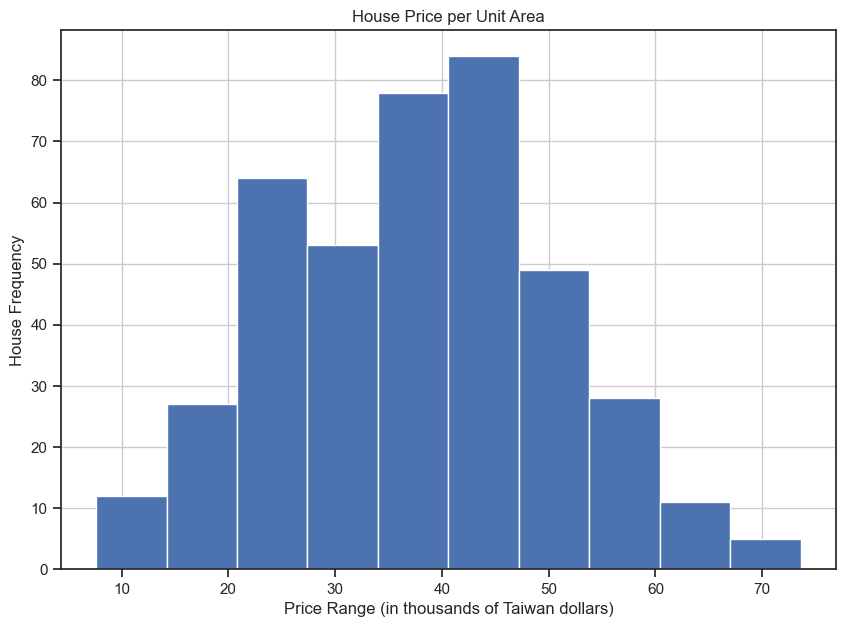

In [242]:
# Construct a histogram of the 'house price of unit area' variable after removing outliers.
fig, ax = plt.subplots(figsize = (10, 7))
# Set the grid = True, to get a better sense of the values.
df_real_estate_data_file['Y_house_price_of_unit_area'].hist(grid = True)
plt.title('House Price per Unit Area')
plt.xlabel('Price Range (in thousands of Taiwan dollars)')
plt.ylabel('House Frequency')
plt.show()

### 2.4 The Five number summary

In [244]:
# The five number summary includes the median, the upper and lower quartiles, and the maximum and minimum values.
# Below we can see all of the above concluding the five number summary.
median = np.median(df_real_estate_data_file['Y_house_price_of_unit_area'])
lower_quantile = np.quantile(df_real_estate_data_file['Y_house_price_of_unit_area'], .25)
upper_quantile = np.quantile(df_real_estate_data_file['Y_house_price_of_unit_area'], .75)
max_value = df_real_estate_data_file['Y_house_price_of_unit_area'].max()
min_value = df_real_estate_data_file['Y_house_price_of_unit_area'].min()

print('Median = %.2f'% median)
print('Lower_quantile = %.2f'% lower_quantile)
print('Upper_quantile = %.2f'% upper_quantile)
print('Max_value = %.2f'% max_value)
print('Min_value = %.2f'% min_value)


Median = 38.40
Lower_quantile = 27.50
Upper_quantile = 46.30
Max_value = 73.60
Min_value = 7.60


The lower quartile is 27.70, so around 25% of the observations have house prices per unit area under $277000.

The upper quartile is 46.60, so around 75% of the observations have house prices per unit area under $466000.

### 2.6 Scatterplot - pairwise plots

Scatterplots demonstrate the relationships between the variables and their distributions.

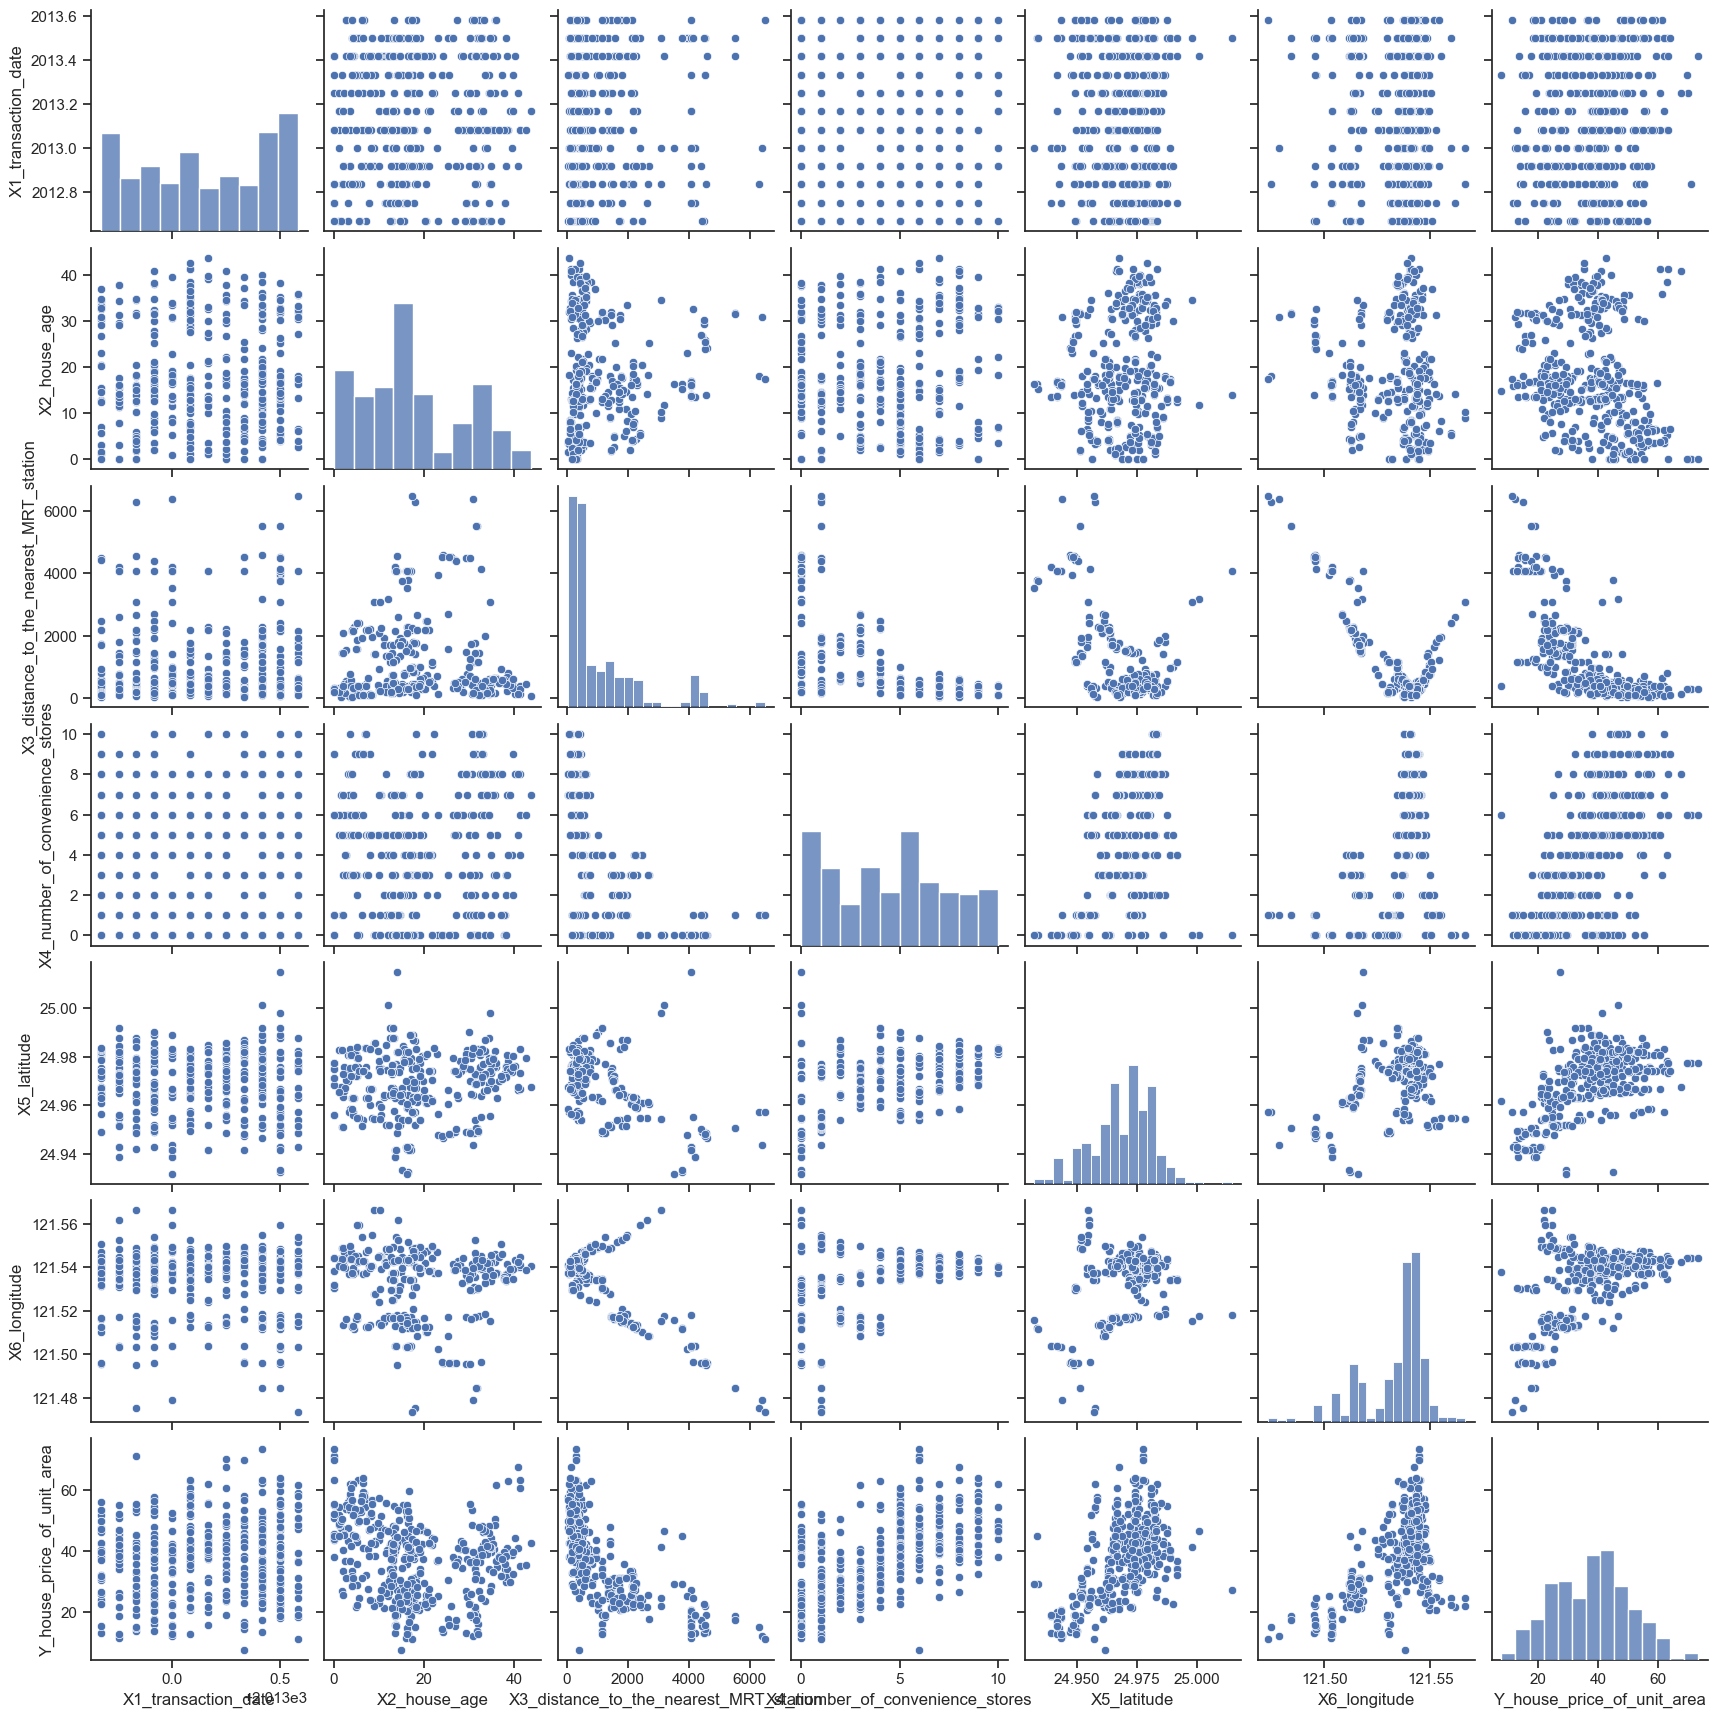

In [247]:
# Scatterplot
sns.set(style = "ticks")
sns.pairplot(df_real_estate_data_file)

The output shows that the house price of a unit area is positively correlated with the number of convenience stores, but negatively correlated with the distance to the nearest MRT station and the house age. There is also a moderate positive correlation with latitude and a moderate positive correlation with longitude.

### 2.7 Correlation

#### 2.7.1 Correlation Table

In [173]:
df_real_estate_data_file.corr()

,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
X1_transaction_date,1.000000,0.010069,0.065707,0.002349,0.032915,-0.043726,0.067020
X2_house_age,0.010069,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
X3_distance_to_the_nearest_MRT_station,0.065707,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
X4_number_of_convenience_stores,0.002349,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
X5_latitude,0.032915,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
X6_longitude,-0.043726,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
Y_house_price_of_unit_area,0.067020,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


#### 2.7.2 Correlation Heatmap

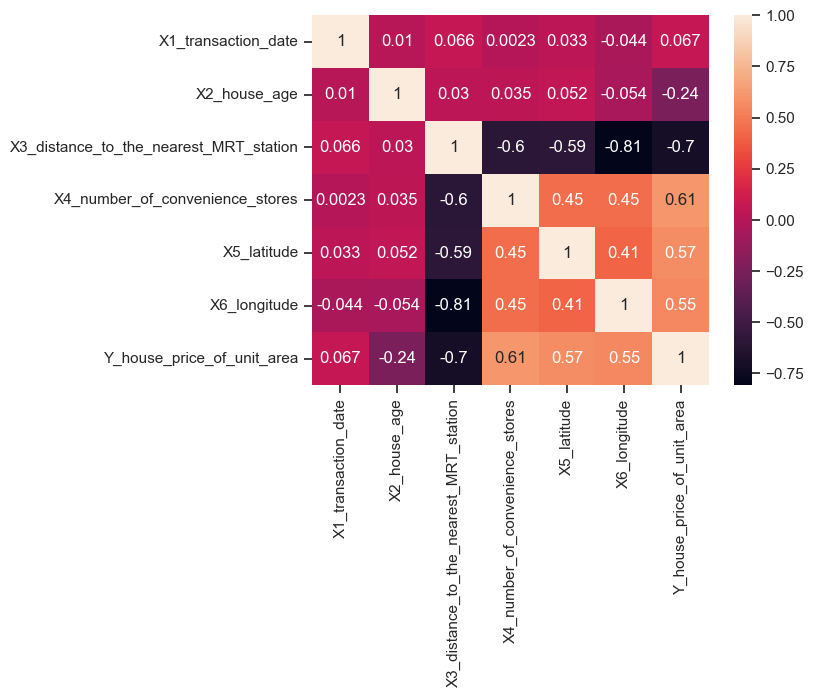

In [174]:
# Correlation
corr = df_real_estate_data_file.corr()
sns.heatmap(corr, annot=True)
plt.show()

The heatmap confirms the correlations between the variables, and we can see that there is no strong correlation between any pair of variables except the following. We look for any values where the absolute value is .7 or greater for a strong correlation.
             
             1) X3_distance_to_the_nearest_MRT_station has a strong correlation with X6_longitude.
             2) Y_house_price_of_unit_area and X3_distance_to_the_nearest_MRT_station have a correlation of 0.7 
                which can be considered a strong correlation.

In [248]:
# Dropping X6_longitude as it is highly correlated with other predictors.
df_real_estate_data_file = df_real_estate_data_file.drop('X6_longitude', axis = 1)

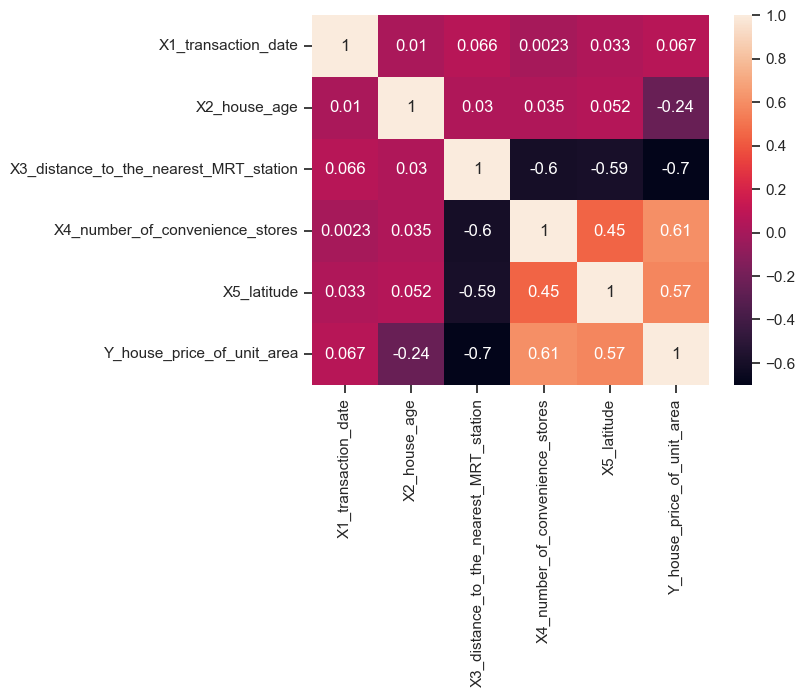

In [249]:
# Checking the correlation again using heatmap
corr = df_real_estate_data_file.corr()
sns.heatmap(corr, annot=True)
plt.show()

## 3. Model Selection

### 3.1. Normal GLM - identity link function

Normal GLM explicitly models a normally distributed response variable.

In [251]:
# GLM assuming normal response, identity link
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'Y_house_price_of_unit_area ~ X1_transaction_date + X2_house_age  + X4_number_of_convenience_stores + X5_latitude'
fit_real_estate_normal = smf.glm(formula = formula, data = df_real_estate_data_file, family = sm.families.Gaussian()).fit()
print(fit_real_estate_normal.params)
print(fit_real_estate_normal.summary())

Intercept                         -14989.976129
X1_transaction_date                    2.538906
X2_house_age                          -0.314117
X4_number_of_convenience_stores        1.928892
X5_latitude                          397.054528
dtype: float64
                     Generalized Linear Model Regression Results                      
Dep. Variable:     Y_house_price_of_unit_area   No. Observations:                  411
Model:                                    GLM   Df Residuals:                      406
Model Family:                        Gaussian   Df Model:                            4
Link Function:                       identity   Scale:                          72.237
Method:                                  IRLS   Log-Likelihood:                -1460.2
Date:                        Mon, 27 Feb 2023   Deviance:                       29328.
Time:                                22:23:15   Pearson chi2:                 2.93e+04
No. Iterations:                             3   P

In [252]:
# Normal GLM
print("Normal model AIC = %.2f" %fit_real_estate_normal.aic)
print("Normal model BIC = %.2f" %fit_real_estate_normal.bic)

Normal model AIC = 2930.39
Normal model BIC = 26884.50


/Users/yash.chaturvedi/Library/Python/3.11/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### 3.2. Gamma GLM - identity link function

Gamma GLM assumes that the response variable has a gamma distribution which is commonly used to model non-negative continuous data that is right-skewed which we have already know is the case.

In [253]:
# GLM assuming gamma response, identity link
identity_link = sm.families.links.identity()
gamma_dist = sm.families.Gamma(link = identity_link)
gamma_mod = smf.glm(formula = formula, data = df_real_estate_data_file, family = gamma_dist)
fit_real_estate_gamma = gamma_mod.fit()
print(fit_real_estate_gamma.params)
print(fit_real_estate_gamma.summary())

Intercept                         -19199.534823
X1_transaction_date                    4.490857
X2_house_age                          -0.268576
X4_number_of_convenience_stores        1.901224
X5_latitude                          408.239881
dtype: float64
                     Generalized Linear Model Regression Results                      
Dep. Variable:     Y_house_price_of_unit_area   No. Observations:                  411
Model:                                    GLM   Df Residuals:                      406
Model Family:                           Gamma   Df Model:                            4
Link Function:                       identity   Scale:                        0.060182
Method:                                  IRLS   Log-Likelihood:                -1461.7
Date:                        Mon, 27 Feb 2023   Deviance:                       23.638
Time:                                22:23:24   Pearson chi2:                     24.4
No. Iterations:                            21   P

/Users/yash.chaturvedi/Library/Python/3.11/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [254]:
# Gamma GLM
print("Gamma model AIC = %.2f" %fit_real_estate_gamma.aic)
print("Gamma model BIC = %.2f" %fit_real_estate_gamma.bic)

Gamma model AIC = 2933.45
Gamma model BIC = -2419.91


/Users/yash.chaturvedi/Library/Python/3.11/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### 3.3. Multiple Linear Regression

In [255]:
# Fitting the linear model using the explanatory variables
fit_real_estate = smf.ols(formula = formula, data = df_real_estate_data_file).fit()
print(fit_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     Y_house_price_of_unit_area   R-squared:                       0.561
Model:                                    OLS   Adj. R-squared:                  0.557
Method:                         Least Squares   F-statistic:                     129.9
Date:                        Mon, 27 Feb 2023   Prob (F-statistic):           2.66e-71
Time:                                22:23:32   Log-Likelihood:                -1460.2
No. Observations:                         411   AIC:                             2930.
Df Residuals:                             406   BIC:                             2950.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [256]:
print("Linear regression model AIC = %.2f" %fit_real_estate.aic)
print("Linear regression model BIC = %.2f" %fit_real_estate.bic)

Linear regression model AIC = 2930.39
Linear regression model BIC = 2950.49


### 3.4. Multiple Linear Regression with log transformed response variable

In [257]:
df_real_estate_data_file['log_Y_house_price_of_unit_area'] = np.log(df_real_estate_data_file['Y_house_price_of_unit_area'])

# Define the formula for the linear model using the log-transformed variable
formula_log = 'log_Y_house_price_of_unit_area ~ X2_house_age + X3_distance_to_the_nearest_MRT_station + X4_number_of_convenience_stores + X5_latitude'

# Fit the linear model using the log-transformed variable
fit_real_estate_log = smf.ols(formula=formula_log, data=df_real_estate_data_file).fit()

# Print the summary of the fitted model
print(fit_real_estate_log.summary())

                                  OLS Regression Results                                  
Dep. Variable:     log_Y_house_price_of_unit_area   R-squared:                       0.694
Model:                                        OLS   Adj. R-squared:                  0.691
Method:                             Least Squares   F-statistic:                     230.1
Date:                            Mon, 27 Feb 2023   Prob (F-statistic):          6.01e-103
Time:                                    22:24:01   Log-Likelihood:                 52.465
No. Observations:                             411   AIC:                            -94.93
Df Residuals:                                 406   BIC:                            -74.84
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                             coef    std err          t      P>|t|      [0

In [258]:
print("Linear regression model (log transformed) AIC = %.2f" %fit_real_estate_log.aic)
print("Linear regression model (log transformed) BIC = %.2f" %fit_real_estate_log.bic)

Linear regression model (log transformed) AIC = -94.93
Linear regression model (log transformed) BIC = -74.84


### 3.5. Gamma GLM with log transformed response variable

In [260]:
# GLM assuming gamma response, identity link
identity_link = sm.families.links.identity()
gamma_dist = sm.families.Gamma(link = identity_link)
gamma_mod = smf.glm(formula = formula_log, data = df_real_estate_data_file, family = gamma_dist)
fit_real_estate_gamma_log = gamma_mod.fit()

print(fit_real_estate_gamma.summary())

                       Generalized Linear Model Regression Results                        
Dep. Variable:     log_Y_house_price_of_unit_area   No. Observations:                  411
Model:                                        GLM   Df Residuals:                      406
Model Family:                               Gamma   Df Model:                            4
Link Function:                           identity   Scale:                       0.0039729
Method:                                      IRLS   Log-Likelihood:                 27.123
Date:                            Mon, 27 Feb 2023   Deviance:                       1.6834
Time:                                    22:24:38   Pearson chi2:                     1.61
No. Iterations:                                10   Pseudo R-squ. (CS):             0.8845
Covariance Type:                        nonrobust                                         
                                             coef    std err          z      P>|z|      [0

/Users/yash.chaturvedi/Library/Python/3.11/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [261]:
print("Gamma model (log transformed) AIC = %.2f" %fit_real_estate_gamma_log.aic)
print("Gamma model (log transformed) BIC = %.2f" %fit_real_estate_gamma_log.bic)

Gamma model (log transformed) AIC = -44.25
Gamma model (log transformed) BIC = -2441.87


/Users/yash.chaturvedi/Library/Python/3.11/lib/python/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### 3.6. Model Selection comparison

We will compare AICs for the different models and choose the one with lowest AIC.

As we can see the linear regression model with logarithmic response variable has the lowest AIC of -94.93, therefore we will be choosing to work with this model. More details shown in report.

## 4. Model Analysis

In [262]:
df_real_estate_data_file_log = df_real_estate_data_file.drop('Y_house_price_of_unit_area', axis = 1)
df_real_estate_data_file_no_log = df_real_estate_data_file.drop('log_Y_house_price_of_unit_area', axis = 1)

Our data does follow the assumptions of Linear Regression Model - linearity, independence, homoscedasticity, normality, no multicollinearity, and no influential outliers.

### 4.1. Fitting the Multiple Linear Regression Model

In [263]:
# assign independent variables, dependent variable, respectively
x = df_real_estate_data_file_log.loc[:, df_real_estate_data_file_log.columns != 'log_Y_house_price_of_unit_area']
# define the target
y = pd.DataFrame(df_real_estate_data_file_log['log_Y_house_price_of_unit_area'])

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state=42)

In [265]:
sk_model = LinearRegression()

In [266]:
sk_model.fit(x_train, y_train)

LinearRegression()

### 4.2. Model coefficients

In [268]:
print('Model Coefficients:', sk_model.coef_)
print()
print('Intercept:', sk_model.intercept_)
coef = pd.DataFrame(sk_model.coef_.T, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)
joined 

Model Coefficients: [[ 1.03858607e-01 -7.50977184e-03 -1.66442633e-04  2.58434576e-02
   8.00362178e+00]]

Intercept: [-405.16706289]


,Columns,Coefficients
0,X1_transaction_date,0.103859
1,X2_house_age,-0.007510
2,X3_distance_to_the_nearest_MRT_station,-0.000166
3,X4_number_of_convenience_stores,0.025843
4,X5_latitude,8.003622


### 4.3. Prediction Equation

##### Prediction Equation: using the coefficients found from section 4.2.
         
         log_Y_house_price_of_unit_area = -405.17 + 0.104*X1_transaction_date - 0.007*X2_house_age - 0.0002*X3_distance_to_the_nearest_MRT_station + 0.026*X4_number_of_convenience_stores + 8.004*X5_latitude

In [269]:
predictions = sk_model.predict(x_test)
pd.DataFrame(predictions, columns=['Predictions'])

,Predictions
0,3.591862
1,3.821303
2,4.013959
3,3.273680
4,3.875365
...,...
119,3.454753
120,3.658973
121,3.223999
122,3.390844


### 4.4. R-squared vs Adj R-squared

In [270]:
train_score = sk_model.score(x_train, y_train)
test_score = sk_model.score(x_test, y_test)

n = len(y_train)
p = len(x_train.columns)

adj_train_score = 1 - (1 - train_score) * ((n - 1) / (n - p - 1))
adj_test_score = 1 - (1 - test_score) * ((n - 1) / (n - p - 1))

print('R-squared (train): %.2f' %train_score)
print('Adjusted R-squared (train): %.2f' %adj_train_score)
print('R-squared (test): %.2f' %test_score)
print('Adjusted R-squared (test): %.2f' %adj_test_score)

R-squared (train): 0.77
Adjusted R-squared (train): 0.77
R-squared (test): 0.53
Adjusted R-squared (test): 0.52


### 4.5. Plot - Actual vs Predicted values

Residual analysis: Plotting the residuals (the difference between the actual and predicted values) against the predicted values. The plot should show no obvious patterns, indicating that the model is capturing all of the relevant information in the data.

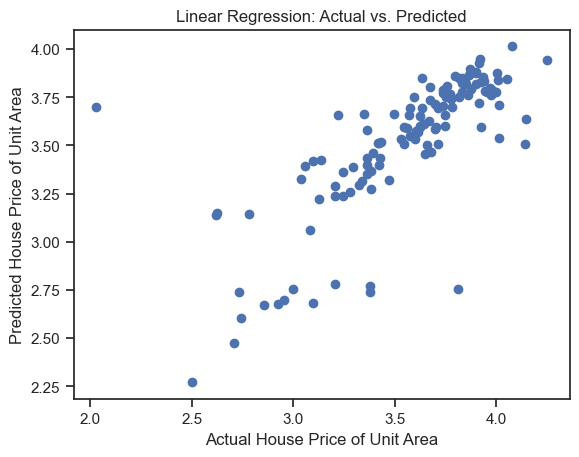

In [271]:
# Plot the predicted values against the actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()